# Simulations comparing LVM-I PSF before/after FRD

Nick Konidaris
30-May-2022

Summary: I simulate the effect of FRD when the fibers deliver a 2.0-deg-FWHM versus 1.5-deg-FWHM frd rings. The analysis shows that there is PSF variation at the few percent level in the "wings" of the PSF.

Methods: Zemax allows me to adjust the NA into the spectrograph. The apodiziation is crude (tophat), but represents a worst-case analysis.

In [68]:
import numpy as np
from pylab import *
rc("font", size=15)

# Conversion of FRD to Pupils

In [69]:
def na_to_fno(na):
    """ Convert a NA to focal ratio """
    return 1/(2*na)

def fno_to_na(fno):
    """ Convert Fno to NA """
    return na_to_fno(fno) # Turns out these are inverse functions
    
def fno_to_area(fno):
    return np.pi * (fno/2)**2

def area_to_fno(area):
    return 2*np.sqrt(area/np.pi)

assert(area_to_fno(fno_to_area(3)) == 3)

In [70]:
na_rx = 0.14018
ar_rx = fno_to_area(na_to_fno(na_rx))

ar_degraded = ar_rx * 9./6. # Tobias predicts, via email, that the prescribed FRD loss is 6% with 1.5-deg-FWHM and 9% with 2.0-deg-FWHM
na_degraded = fno_to_na(area_to_fno(ar_degraded))


In [71]:
fno_to_na(area_to_fno(ar_rx) * 1.06), fno_to_na(area_to_fno(ar_rx) * 1.09)

(0.1322452830188679, 0.12860550458715594)

## Semi-Analytic Simulations of FRD

Here I take results from the RED spectrograph Zemax (FRD Study 30-may-2022\2711-DESI-0034-V1-Red)

I input NAs of .13224528 (low FRD) and 0.128605 (high FRD)

In [72]:
psf_high_frd = np.fromstring("""
  0.0000E+00	  0.0000E+00	  3.1085E-02	  2.1760E-01	  3.9967E-02	  0.0000E+00	  0.0000E+00
  0.0000E+00	  1.0169E+00	  4.7916E+01	  1.2432E+02	  4.8094E+01	  1.0613E+00	  0.0000E+00
  8.8816E-03	  3.1081E+01	  3.4974E+02	  4.5891E+02	  3.5012E+02	  3.0437E+01	  1.3322E-02
  1.7319E-01	  7.9339E+01	  4.5713E+02	  4.8864E+02	  4.5803E+02	  7.9437E+01	  1.9095E-01
  3.5526E-02	  3.2933E+01	  3.4319E+02	  4.6148E+02	  3.4459E+02	  3.3173E+01	  3.5526E-02
  0.0000E+00	  2.2071E+00	  4.9457E+01	  1.1884E+02	  4.8573E+01	  2.1937E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.5082E-01	  1.1679E+00	  2.9309E-01	  0.0000E+00	  0.0000E+00
""", sep=" ").reshape((7,7))

In [73]:
psf_low_frd = np.fromstring("""
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  4.1002E+01	  1.2118E+02	  4.1330E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  1.9242E+01	  3.6186E+02	  4.6855E+02	  3.6109E+02	  1.9397E+01	  0.0000E+00
  0.0000E+00	  6.6043E+01	  4.7660E+02	  4.8921E+02	  4.7746E+02	  6.6083E+01	  0.0000E+00
  0.0000E+00	  2.1072E+01	  3.5881E+02	  4.7170E+02	  3.5900E+02	  2.0947E+01	  0.0000E+00
  0.0000E+00	  4.4408E-03	  4.2667E+01	  1.1944E+02	  4.1761E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
""", sep=" ").reshape((7,7))

Text(0.5, 1.0, '(PSF1 - PSF2)/max(PSF1)')

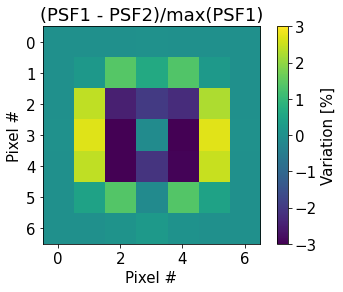

In [74]:
imshow(100*(psf_high_frd - psf_low_frd)/np.max(psf_low_frd), vmin=-3, vmax=3)
colorbar(label="Variation [%]")

xlabel("Pixel #")
ylabel("Pixel #")
title("(PSF1 - PSF2)/max(PSF1)")

Text(0.5, 1.0, '(PSF1 - PSF2)/max(PSF1)')

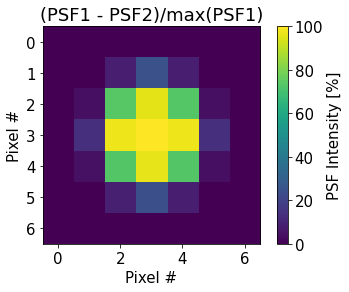

In [77]:
imshow(100*psf_low_frd/np.max(psf_low_frd))
colorbar(label="PSF Intensity [%]")

xlabel("Pixel #")
ylabel("Pixel #")
title("(PSF1 - PSF2)/max(PSF1)")